### Test different versions of the Clausius-Clapyron equation

Bottom line -- rootfinding, the full explicit equation, and the curve fit
all give almost identical results compared to the approximate standard_es

This notebook makes use of the convenience functions in [rootfinder.py](https://github.com/phaustin/A405/blob/master/a405thermo/rootfinder.py)

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from a405thermo import rootfinder as rf

Tp = 273.16  #K
cpv=1870.  #J/kg/K
cl=4187.  #J/kg/K
es0=6.11 #hPa
T0=273.15
lv0=2.501e6  #J/kg
phi0=lv0/Tp  #J/kg/K
Rv= 461.5

def standard_es(temp):
    """
       input: temp (K)
       output:  es (hPa)
    """
    es=es0*np.exp(lv0/Rv*((1./T0) - (1./temp)))
    return es

def fitted_es(temp):
    """
      input: temp (K)
      return:  es (hPa)
    """
    temp = temp - T0
    es=6.112*np.exp(17.67*temp/(temp + 243.5))
    return es

In [ ]:
def lv_fun(temp):
    out=(cpv - cl)*(temp-Tp) + lv0
    return out

def zero_es(esat,temp):
    """
      rootfinder: version of esat
      esat = esat in hPa
      temp: temperature in K
    """
    lv=lv_fun(temp)
    phi0=lv0/Tp
    resid =  cpv*np.log(temp/Tp) - Rv*np.log(esat/es0) + phi0 - cl*np.log(temp/Tp) - lv/temp
    return resid

def good_es(temp):
    """
       full version from my notes
    """
    lv=lv_fun(temp)
    body = (cpv*np.log(temp/Tp) + phi0 - cl*np.log(temp/Tp) - lv/temp)/Rv
    out=es0*np.exp(body)
    return(out)

def zero_find_es(temp):
    esguess=standard_es(temp)
    brackets=rf.find_interval(zero_es,esguess,temp)
    resid = rf.fzero(zero_es,brackets,temp)
    return resid

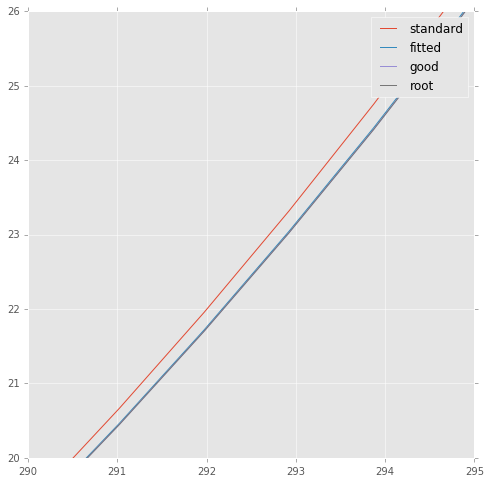

In [7]:
%matplotlib inline
temp=np.linspace(273,310,40)
es_root=[zero_find_es(Tk) for Tk in temp]

plt.style.use('ggplot')
plt.close('all')
fig,ax = plt.subplots(1,1,figsize=(8,8))
es_stand = standard_es(temp)
es_fit = fitted_es(temp)
es_good = good_es(temp)
ax.plot(temp,es_stand,label='standard')
ax.plot(temp,es_fit,label='fitted')
ax.plot(temp,es_good,label='good')
ax.plot(temp,es_root,label='root')
ax.set(xlim=(290,295),ylim=(20,26))
ax.legend()
plt.show()